<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.2.2: Boosting

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9429
    - **ROC AUC**  = 0.9333
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious, iterative and interactive process. It is part of the process to repeat, review and change when finding a dead-end.

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [ ]:
# different params for Decision Tree
params  = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 3, 4]
}

In [ ]:
# using decision tree classifier as model
clf = DecisionTreeClassifier(random_state=42)

# using grid search cv with params
gs_dt = GridSearchCV(clf,
                     param_grid=params,
                     scoring='accuracy',
                     cv = 10
                    )

# fit X and y into Decision Tree Classifier model
gs_dt.fit(X_train, y_train)

# getting best params
print(gs_dt.best_params_)

In [ ]:
# Model Decision Tree with Best Params
model = DecisionTreeClassifier(criterion='gini', max_depth=4, max_features=0.8, min_samples_split=2, splitter='best', random_state=42)

# Fit model
model.fit(X_train, y_train)

# predict the using train set data
y_train_pred = model.predict(X_train)

# finding the scores between y_train and y_predicted
print(f"Accuracy: {metrics.accuracy_score(y_train, y_train_pred):.2f}\nPrecision Score: {metrics.precision_score(y_train, y_train_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(y_train, y_train_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_train, y_train_pred)}")

Accuracy: 0.99
Precision Score: 1.00
Recall Score: 0.98
Confusion Matrix: [[286   0]
 [  4 165]]


In [ ]:
# predict the test set data to check if overfit
y_test_pred = model.predict(X_test)

# finding the scores between y_train and y_predicted
print(f"Accuracy: {metrics.accuracy_score(y_test, y_test_pred):.2f}\nPrecision Score: {metrics.precision_score(y_test, y_test_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(y_test, y_test_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_test, y_test_pred)}")

Accuracy: 0.96
Precision Score: 0.93
Recall Score: 0.95
Confusion Matrix: [[68  3]
 [ 2 41]]


In [16]:
# boosting using Decision tree model
np.random.seed(0)
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, max_features=0.8, min_samples_split=2, splitter='best', random_state=42)
boost = AdaBoostClassifier(estimator = clf, n_estimators = 10)   

# fit boosting model with training data
boost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                    max_features=0.8,
                                                    random_state=42),
                   n_estimators=10)

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [17]:
# predict the using train set data
y_train_pred = boost.predict(X_train)

# finding the scores between y_train and y_predicted
print(f"Accuracy: {metrics.accuracy_score(y_train, y_train_pred):.2f}\nPrecision Score: {metrics.precision_score(y_train, y_train_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(y_train, y_train_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_train, y_train_pred)}")

Accuracy: 1.00
Precision Score: 1.00
Recall Score: 1.00
Confusion Matrix: [[286   0]
 [  0 169]]


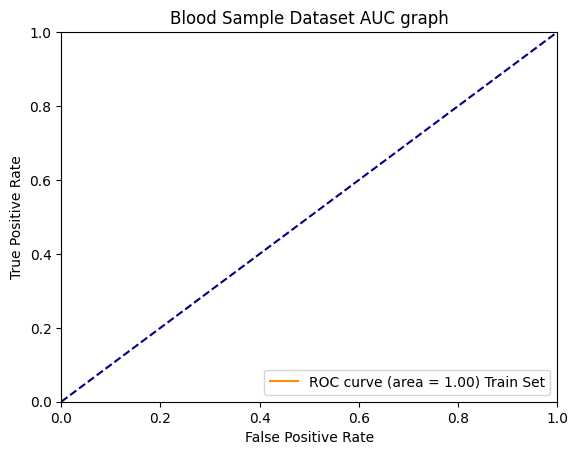

In [19]:
# predict probability
y_train_prob = boost.predict_proba(X_train)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_train, y_train_prob)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label = 'ROC curve (area = %0.2f) Train Set' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Blood Sample Dataset AUC graph')
plt.legend(loc = "lower right")
plt.show()

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [21]:
# predict the test set data
y_test_pred = boost.predict(X_test)

# finding the scores between y_train and y_predicted
print(f"Accuracy: {metrics.accuracy_score(y_test, y_test_pred):.2f}\nPrecision Score: {metrics.precision_score(y_test, y_test_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(y_test, y_test_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_test, y_test_pred)}")

Accuracy: 0.96
Precision Score: 0.95
Recall Score: 0.95
Confusion Matrix: [[69  2]
 [ 2 41]]


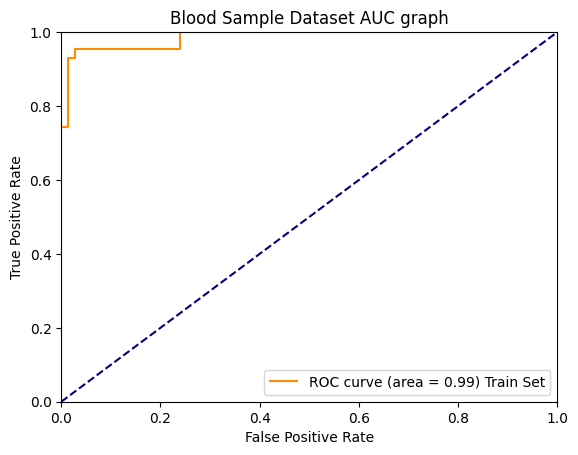

In [22]:
# predict probability
y_test_prob = boost.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_prob)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label = 'ROC curve (area = %0.2f) Train Set' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Blood Sample Dataset AUC graph')
plt.legend(loc = "lower right")
plt.show()

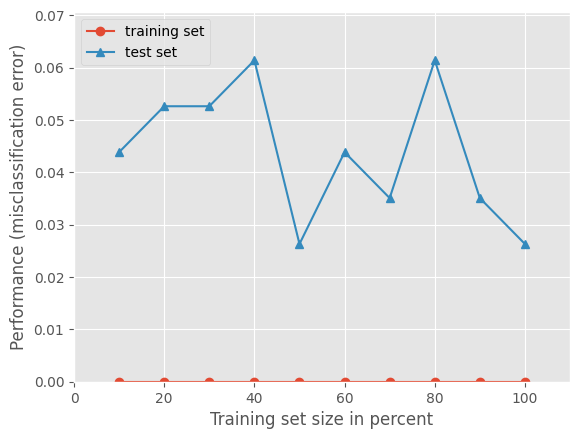

In [24]:
# plot learning curves
np.random.seed(0)
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, boost, print_model = False, style = 'ggplot')
plt.show()

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



